In [125]:
#Sofias notebook
#Trees in NY

In [126]:
#Tip I received on how to know which branch I am on:

import subprocess
subprocess.check_output(["git", "rev-parse", "--abbrev-ref", "HEAD"])



b'Sofias_branch\n'

In [127]:
import pandas as pd

path_csv = "2015-street-tree-census-tree-data.csv"

df = pd.read_csv(path_csv)

df.shape

(683788, 45)

In [128]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [129]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [130]:
df["borough"].isna().sum()

#No value with NA in column borough

np.int64(0)

In [131]:
tree_ny = df["borough"].value_counts()

tree_ny

borough
Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: count, dtype: int64

In [132]:
# Convert Series to DataFrame
tree_ny_df = tree_ny.reset_index()
tree_ny_df.columns = ['borough', 'tree_count']
tree_ny_df['borough'] = tree_ny_df['borough'].str.upper()

tree_ny_df

,borough,tree_count
0,QUEENS,250551
1,BROOKLYN,177293
2,STATEN ISLAND,105318
3,BRONX,85203
4,MANHATTAN,65423


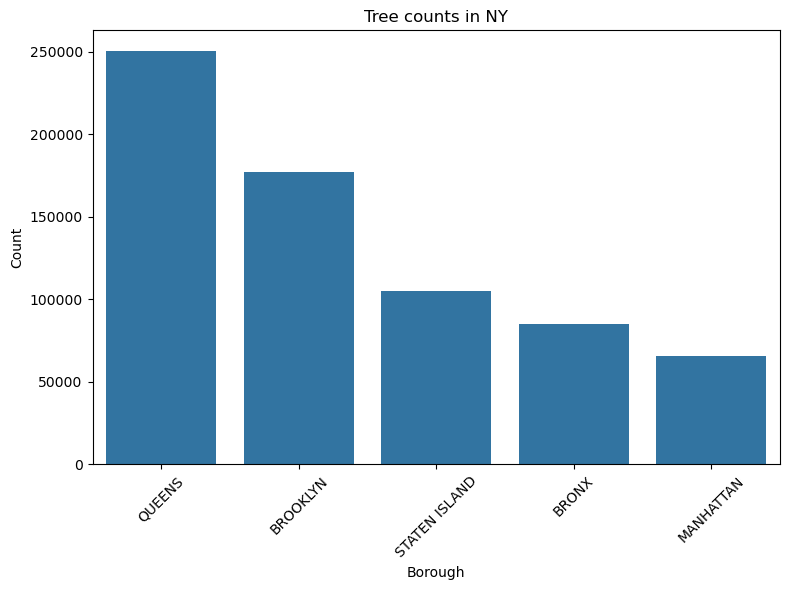

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(data=tree_ny_df, x='borough', y='tree_count')
plt.title("Tree counts in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
path_noise = "Noise_complaint_mass.csv"

dfn = pd.read_csv(path_noise)

print(dfn.shape)

dfn.head()

(2440, 4)


,Location Type,City,Borough,num_calls
0,Club/Bar/Restaurant,STATEN ISLAND,STATEN ISLAND,40
1,Club/Bar/Restaurant,NEW YORK,MANHATTAN,18
2,Club/Bar/Restaurant,STATEN ISLAND,STATEN ISLAND,21
3,Club/Bar/Restaurant,NEW YORK,MANHATTAN,160
4,Club/Bar/Restaurant,BROOKLYN,BROOKLYN,17


In [135]:
dfn["Borough"].isna().sum()

np.int64(0)

In [136]:
noise_ny = dfn["Borough"].value_counts()

noise_ny

Borough
MANHATTAN        1076
BROOKLYN          736
QUEENS            418
BRONX             141
STATEN ISLAND      64
Unspecified         5
Name: count, dtype: int64

In [137]:
# Remove rows where Borough is "Unspecified"
dfn = dfn[dfn["Borough"] != "Unspecified"]

print(f"Shape after removing Unspecified: {dfn.shape}")
noise_ny = dfn["Borough"].value_counts()

Shape after removing Unspecified: (2435, 4)


In [138]:
noise_ny_df = noise_ny.reset_index()
noise_ny_df.columns = ['borough', 'noise_count']

noise_ny_df

,borough,noise_count
0,MANHATTAN,1076
1,BROOKLYN,736
2,QUEENS,418
3,BRONX,141
4,STATEN ISLAND,64


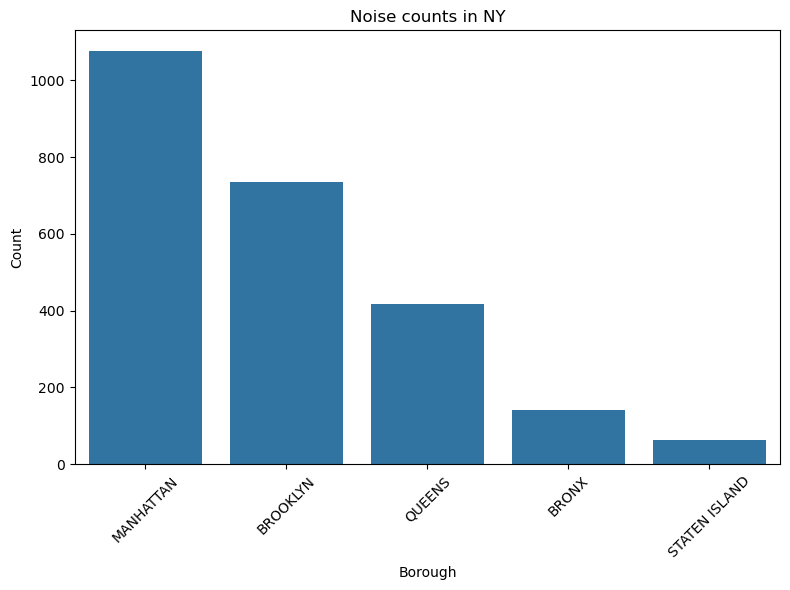

In [139]:
plt.figure(figsize=(8,6))
sns.barplot(data=noise_ny_df, x='borough', y='noise_count')
plt.title("Noise counts in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
path_traffic = "Automated_Traffic_Volume_Counts_20250420.csv"

dft = pd.read_csv(path_traffic)

print(dft.shape)

dft.head()

(1712605, 14)


,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,32970,Queens,2021,4,30,2,0,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
1,32970,Queens,2021,4,30,2,15,1,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
2,11342,Brooklyn,2012,12,18,8,15,33,20063,POINT (985746.5 167127.4),61 ST,15 AV,16 AV,WB
3,32970,Queens,2021,4,30,2,30,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
4,32970,Queens,2021,4,30,2,45,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB


In [141]:
dft["Boro"].isna().sum()

np.int64(0)

In [142]:
traffic_ny = dft["Boro"].value_counts()

traffic_ny

Boro
Queens           527236
Brooklyn         481894
Manhattan        306147
Bronx            279508
Staten Island    117820
Name: count, dtype: int64

In [143]:
# Calculate mean values for each year (Yr) grouped by each borough (Boro)
# First, let's see what columns contain numeric data
print("Columns in dft:")
print(dft.columns.tolist())
print("\nData types:")
print(dft.dtypes)

Columns in dft:
['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID', 'WktGeom', 'street', 'fromSt', 'toSt', 'Direction']

Data types:
RequestID     int64
Boro         object
Yr            int64
M             int64
D             int64
HH            int64
MM            int64
Vol           int64
SegmentID     int64
WktGeom      object
street       object
fromSt       object
toSt         object
Direction    object
dtype: object


In [144]:
# Calculate mean values by Boro and Yr
# Assuming we want to calculate mean of numeric columns (like traffic volume)

# Get numeric columns only (excluding Boro and Yr which are grouping variables)
#numeric_cols = dft.select_dtypes(include=['number']).columns.tolist()
#print(f"Numeric columns found: {numeric_cols}")

# Group by Boro and Yr, then calculate mean
yearly_boro_means = dft.groupby(['Boro', 'Yr'])["Vol"].mean()

print(f"\nMean values by Borough and Year:")
#print(f"Shape: {yearly_boro_means.shape}")
yearly_boro_means.head(10)


Mean values by Borough and Year:


Boro   Yr  
Bronx  2007    978.520904
       2008    720.951166
       2009     69.058889
       2010    119.102899
       2011     62.585884
       2012    153.320389
       2013    127.991634
       2014    171.196088
       2015    122.842667
       2016     58.748972
Name: Vol, dtype: float64

In [145]:
yearly_boro_means.to_csv("traffic_yearly.csv")

In [146]:
# Remove multiple years using a list
years_to_drop = [2000, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017, 2018, 2019]  # Add any years you want to exclude

yearly_boro_means_filtered_multiple = yearly_boro_means[~yearly_boro_means.index.get_level_values('Yr').isin(years_to_drop)]

print(f"Dropping years: {years_to_drop}")
print(f"Original shape: {yearly_boro_means.shape}")
print(f"Years remaining: {sorted(yearly_boro_means_filtered_multiple.index.get_level_values('Yr').unique())}")
yearly_boro_means_filtered_multiple.head(10)

Dropping years: [2000, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Original shape: (92,)
Years remaining: [2020, 2021, 2022, 2023, 2024]


Boro      Yr  
Bronx     2020     86.477759
          2021     54.392698
          2022     72.851356
          2023    100.423382
          2024     46.528695
Brooklyn  2020     79.548800
          2021    144.310433
          2022     86.561837
          2023    168.578995
          2024     84.205367
Name: Vol, dtype: float64

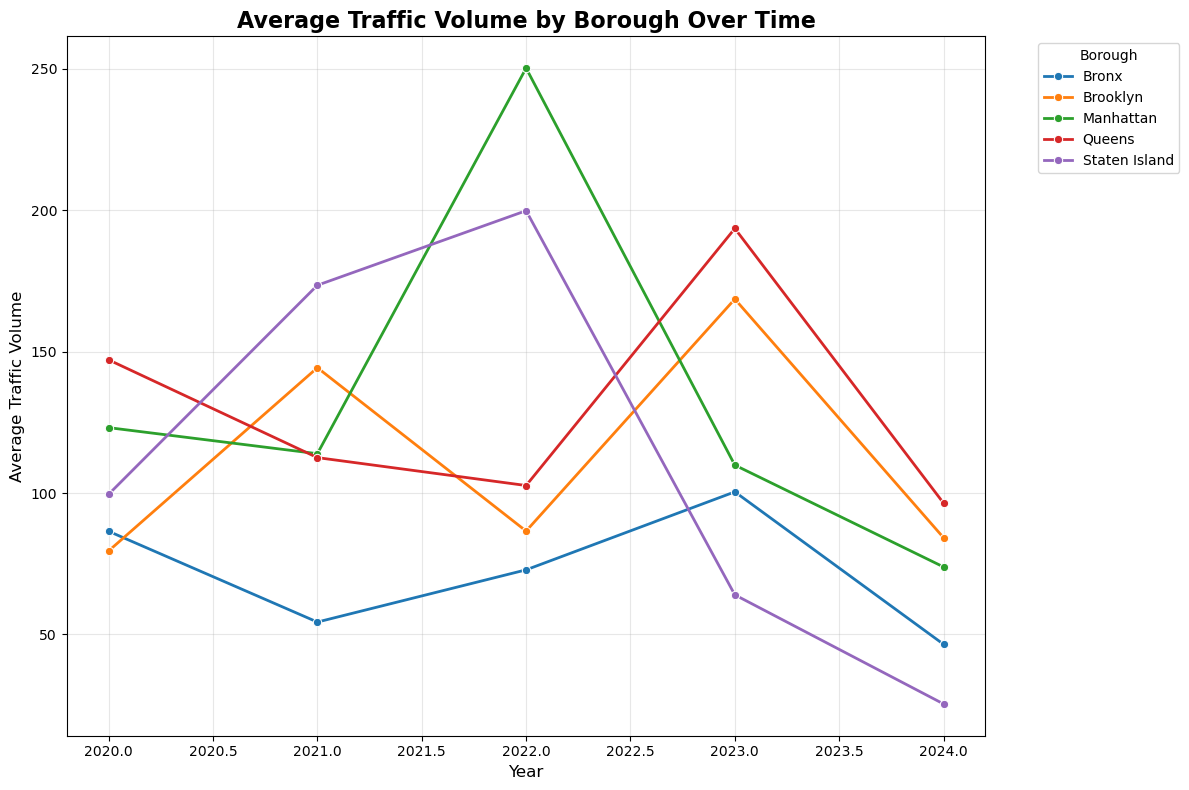

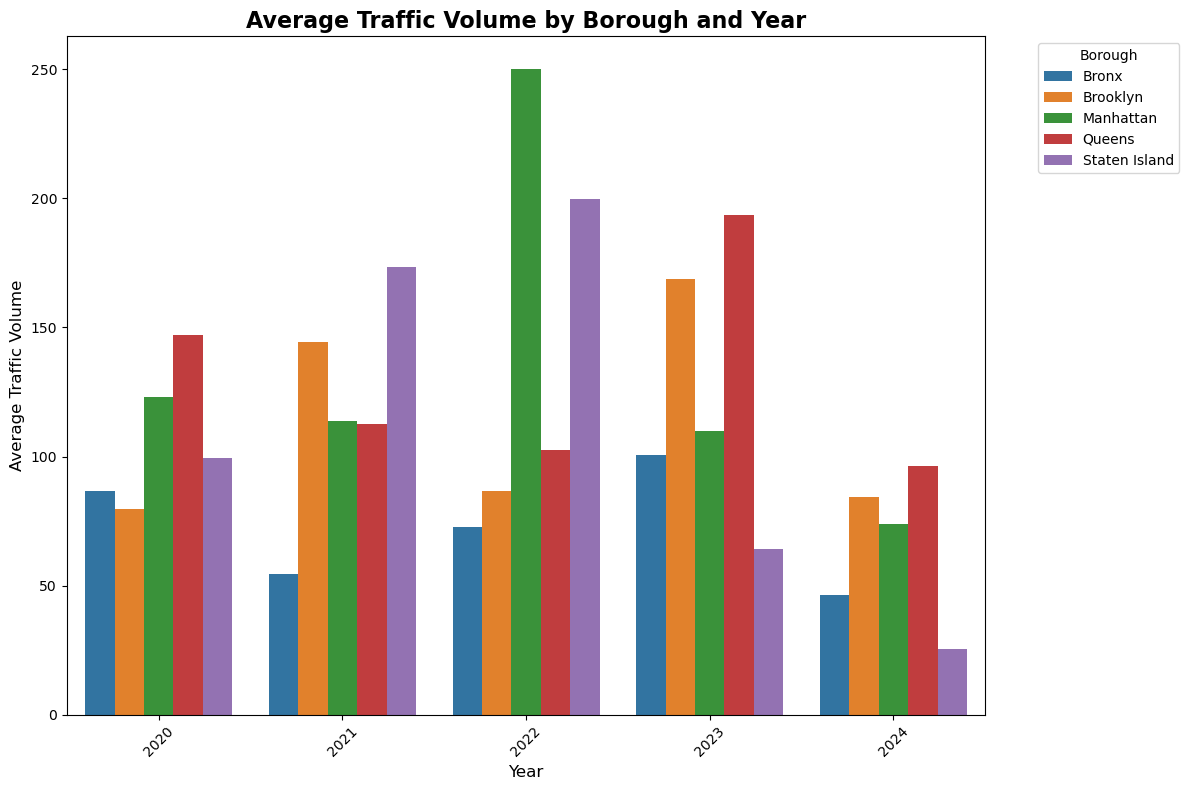

In [147]:
# Create visualization for traffic volume by borough and year
import matplotlib.pyplot as plt
import seaborn as sns

# Convert MultiIndex Series to DataFrame for easier plotting
traffic_df = yearly_boro_means_filtered_multiple.reset_index()
traffic_df.columns = ['Borough', 'Year', 'Mean_Volume']

# Create line plot showing trends over time by borough
plt.figure(figsize=(12, 8))
sns.lineplot(data=traffic_df, x='Year', y='Mean_Volume', hue='Borough', marker='o', linewidth=2)
plt.title('Average Traffic Volume by Borough Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Also create a bar plot for comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=traffic_df, x='Year', y='Mean_Volume', hue='Borough')
plt.title('Average Traffic Volume by Borough and Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
# Correct ways to calculate means from the MultiIndex Series

# Option 1: Overall mean of all values
#overall_mean = yearly_boro_means_filtered_multiple.mean()
#print(f"Overall mean traffic volume: {overall_mean}")

# Option 2: Mean by Borough (group by first level of index)
mean_by_borough = yearly_boro_means_filtered_multiple.groupby('Boro').mean()
print(f"\nMean traffic volume by Borough:")
print(mean_by_borough)

# Option 3: Mean by Year (group by second level of index)
#mean_by_year = yearly_boro_means_filtered_multiple.groupby('Yr').mean()
#print(f"\nMean traffic volume by Year:")
#print(mean_by_year)


Mean traffic volume by Borough:
Boro
Bronx             72.134778
Brooklyn         112.641087
Manhattan        134.200420
Queens           130.446396
Staten Island    112.458627
Name: Vol, dtype: float64


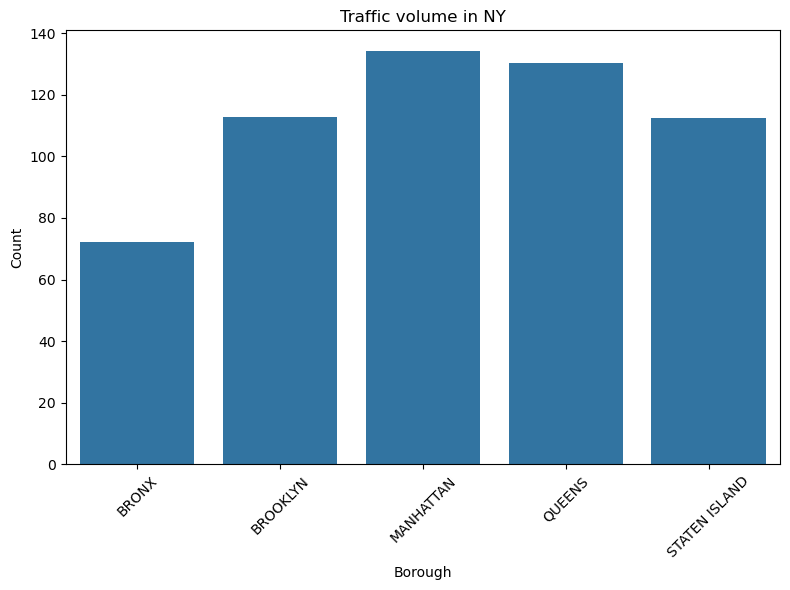

In [149]:
traffic_mean_df = mean_by_borough.reset_index()
traffic_mean_df.columns = ['borough', "traffic_voloume"]
traffic_mean_df['borough'] = traffic_mean_df['borough'].str.upper()

plt.figure(figsize=(8,6))
sns.barplot(data=traffic_mean_df, x='borough',y="traffic_voloume")
plt.title("Traffic volume in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [150]:
#-74.268196,40.489402,-73.691714,40.921195

In [151]:
import sys
print(sys.executable)

c:\Users\Sofia\anaconda3\python.exe


In [152]:
#conda activate blablabla
#pip install openaq

In [153]:
#put a new columns with the neighborhood name

path_pollutant = "Pollutants_NYC.csv"

dfp = pd.read_csv(path_pollutant)

print(dfp.shape)

dfp.head()

(60641, 8)


,location_name,date,sensor_id,pm25,sensor_id_dup,pm10,sensor_id_dup.1,pm1
0,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T14:59:52Z,10986462.0,4.30,NaN,NaN,NaN,NaN
1,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:05:32Z,10986462.0,4.30,NaN,NaN,NaN,NaN
2,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:11:12Z,10986462.0,5.03,NaN,NaN,NaN,NaN
3,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:16:51Z,10986462.0,4.74,NaN,NaN,NaN,NaN
4,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:22:31Z,10986462.0,7.09,NaN,NaN,NaN,NaN


In [154]:
dfp.head()

,location_name,date,sensor_id,pm25,sensor_id_dup,pm10,sensor_id_dup.1,pm1
0,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T14:59:52Z,10986462.0,4.30,NaN,NaN,NaN,NaN
1,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:05:32Z,10986462.0,4.30,NaN,NaN,NaN,NaN
2,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:11:12Z,10986462.0,5.03,NaN,NaN,NaN,NaN
3,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:16:51Z,10986462.0,4.74,NaN,NaN,NaN,NaN
4,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:22:31Z,10986462.0,7.09,NaN,NaN,NaN,NaN


In [155]:
# This is CORRECT - merge 2 DataFrames at a time
merged_df = pd.merge(noise_ny_df, traffic_mean_df, on="borough")
merged_df = pd.merge(merged_df, tree_ny_df, on="borough")

In [156]:
merged_df

,borough,noise_count,traffic_voloume,tree_count
0,MANHATTAN,1076,134.200420,65423
1,BROOKLYN,736,112.641087,177293
2,QUEENS,418,130.446396,250551
3,BRONX,141,72.134778,85203
4,STATEN ISLAND,64,112.458627,105318


In [157]:
pollutant_path = "avg_by_borough.csv"

dfpol = pd.read_csv(pollutant_path)

print(dfpol.shape)

dfpol = dfpol.rename(columns={"pm25":"pm2.5"})

dfpol.head()

(5, 4)


,borough,pm1,pm10,pm2.5
0,Bronx,NaN,12.78,6.46
1,Brooklyn,7.07,14.88,10.32
2,Manhattan,8.98,9.62,10.15
3,Queens,4.96,8.67,8.70
4,Staten Island,NaN,NaN,5.90


In [158]:
dfpol['borough'] = dfpol['borough'].str.upper()

dfpol

,borough,pm1,pm10,pm2.5
0,BRONX,NaN,12.78,6.46
1,BROOKLYN,7.07,14.88,10.32
2,MANHATTAN,8.98,9.62,10.15
3,QUEENS,4.96,8.67,8.70
4,STATEN ISLAND,NaN,NaN,5.90


In [159]:
merged_df = pd.merge(merged_df, dfpol, on="borough")

merged_df

,borough,noise_count,traffic_voloume,tree_count,pm1,pm10,pm2.5
0,MANHATTAN,1076,134.200420,65423,8.98,9.62,10.15
1,BROOKLYN,736,112.641087,177293,7.07,14.88,10.32
2,QUEENS,418,130.446396,250551,4.96,8.67,8.70
3,BRONX,141,72.134778,85203,NaN,12.78,6.46
4,STATEN ISLAND,64,112.458627,105318,NaN,NaN,5.90


In [161]:
merged_df["pm1"] = merged_df["pm1"].fillna(7)

merged_df

,borough,noise_count,traffic_voloume,tree_count,pm1,pm10,pm2.5
0,MANHATTAN,1076,134.200420,65423,8.98,9.62,10.15
1,BROOKLYN,736,112.641087,177293,7.07,14.88,10.32
2,QUEENS,418,130.446396,250551,4.96,8.67,8.70
3,BRONX,141,72.134778,85203,7.00,12.78,6.46
4,STATEN ISLAND,64,112.458627,105318,7.00,NaN,5.90


In [162]:
merged_df["pm10"] = merged_df["pm10"].fillna(11.49)

merged_df

,borough,noise_count,traffic_voloume,tree_count,pm1,pm10,pm2.5
0,MANHATTAN,1076,134.200420,65423,8.98,9.62,10.15
1,BROOKLYN,736,112.641087,177293,7.07,14.88,10.32
2,QUEENS,418,130.446396,250551,4.96,8.67,8.70
3,BRONX,141,72.134778,85203,7.00,12.78,6.46
4,STATEN ISLAND,64,112.458627,105318,7.00,11.49,5.90


         borough    EQS  Category
2         QUEENS  69.74      Good
3          BRONX  61.47      Good
4  STATEN ISLAND  58.72  Moderate
1       BROOKLYN  31.89      Poor
0      MANHATTAN   9.24      Poor


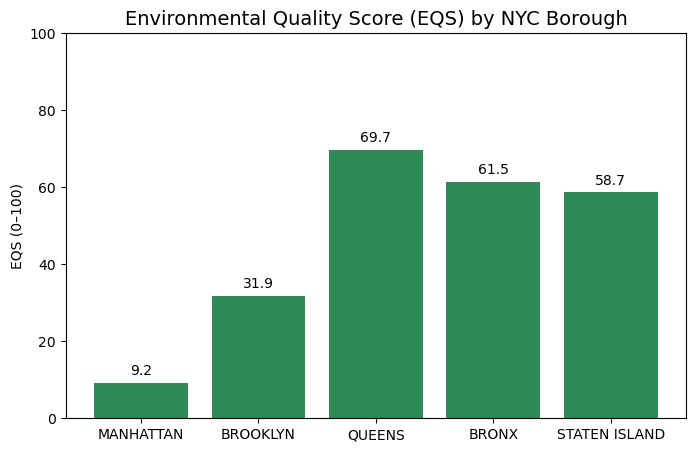

In [169]:
#Scale thing

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- 1. Sample data (replace this with your actual dataset) ---
#data = {
#    "Borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"],
#    "Noise_Complaints": [8200, 5000, 4000, 7000, 2000],
#    "Traffic_Volume": [1200000, 1000000, 900000, 950000, 300000],
#    "Tree_Count": [45000, 70000, 85000, 55000, 90000]
#}

#df = pd.DataFrame(data)

# --- 2. Normalize the data (Min-Max 0–1) ---
scaler = MinMaxScaler()

# We'll normalize each column separately, making sure that "more trees" = better,
# but "more noise" and "more traffic" = worse.
merged_df["Noise_Norm"] = 1 - scaler.fit_transform(merged_df[["noise_count"]])
merged_df["Traffic_Norm"] = 1 - scaler.fit_transform(merged_df[["traffic_voloume"]])
merged_df["Tree_Norm"] = scaler.fit_transform(merged_df[["tree_count"]])
merged_df["pm1_Norm"] = 1 - scaler.fit_transform(merged_df[["pm1"]])
merged_df["pm2.5_Norm"] = 1 - scaler.fit_transform(merged_df[["pm2.5"]])
merged_df["pm10_Norm"] = 1 - scaler.fit_transform(merged_df[["pm10"]])

# --- 3. Compute the Environmental Quality Score (EQS) ---
# Weights can be adjusted — here: Noise 0.3, Traffic 0.4, Trees 0.3
merged_df["EQS"] = 100 * (
    0.1 * merged_df["Noise_Norm"] +
    0.15 * merged_df["Traffic_Norm"] +
    0.15 * merged_df["Tree_Norm"] +
    0.3 * merged_df["pm1_Norm"] +
    0.2 * merged_df["pm2.5_Norm"] +
    0.1 * merged_df["pm10_Norm"]
)

merged_df["EQS"] = merged_df["EQS"].round(2)

# --- 4. Categorize Boroughs based on EQS ---
def classify(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    elif score >= 40:
        return "Moderate"
    else:
        return "Poor"


merged_df["Category"] = merged_df["EQS"].apply(classify)

# --- 5. Display results ---
print(merged_df[["borough", "EQS", "Category"]].sort_values("EQS", ascending=False))

# --- 6. Visualization ---
plt.figure(figsize=(8, 5))
plt.bar(merged_df["borough"], merged_df["EQS"], color="seagreen")
plt.title("Environmental Quality Score (EQS) by NYC Borough", fontsize=14)
plt.ylabel("EQS (0–100)")
plt.ylim(0, 100)
for i, val in enumerate(merged_df["EQS"]):
    plt.text(i, val + 2, f"{val:.1f}", ha="center", fontsize=10)
plt.show()
